# Data Exploration 02

You're working as a data analyst at a cereal marketing company in New York. 

In a strategy meeting, the marketing director tells you that in 2018, the US weight loss industry was worth over $72 Billion dollars, growing 4% compared to the previous year.

In contrast, sales of cold cereal fell 6% to $8.5 billion during the same time period.

Cereal executives have approached the marketing company asking how they can somehow tap into the weight loss market growth to boost the sales of their cereal brands.

Your assignment is to analyze a dataset of nutritional information for major US cereals, and calculate some metrics that can be used by the marketing team.

## Part 1: Import Pandas and load the data

Remember to import Pandas the conventional way. If you've forgotten how, you may want to review [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html).

The dataset for this exploration is stored at the following url:

`https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv`

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values? 

In [11]:
# Part 1: Enter your code below to import Pandas according to the 
# conventional method. Then load the dataset into a Pandas dataframe.

import pandas as pd

# Write any code needed to explore the data by seeing what the first few 
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.

cereal = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv")

cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Part 2: Calculate Summary Statistics

The marketing team has determined that when choosing a cereal, consumers are most interested in `calories`, `sugars`, `fiber`, `fat`, and `protein`.

First, let's calcuate some summary statistics for these categories across the entire dataset. We're particularly intrested in the mean, median, standard deviation, min, and max values. 

There are [multiple ways to accomplish this](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html).

In [12]:
# Part 2: Enter your code below to calculate summary statistics for the 
# calories, sugar, fiber, fat, and protein columns.

cerealStats = cereal.agg({'sugars': ['min', 'max', 'median', 'mean', 'std'], 
            'calories': ['min', 'max', 'median', 'mean', 'std'], 
            'fiber': ['min', 'max', 'median', 'mean', 'std'], 
            'fat': ['min', 'max', 'median', 'mean', 'std'], 
            'protein': ['min', 'max', 'median', 'mean', 'std'],
            'sodium': ['min', 'max', 'median', 'mean', 'std'],
            'carbo': ['min', 'max', 'median', 'mean', 'std'],
            'potass': ['min', 'max', 'median', 'mean', 'std'],
            'vitamins': ['min', 'max', 'median', 'mean', 'std'],
            'cups': ['min', 'max', 'median', 'mean', 'std'],
            'rating': ['min', 'max', 'median', 'mean', 'std']})

cerealStats.head()

,sugars,calories,fiber,fat,protein,sodium,carbo,potass,vitamins,cups,rating
min,-1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.250000,18.042851
max,15.000000,160.000000,14.000000,5.000000,6.000000,320.000000,23.000000,330.000000,100.000000,1.500000,93.704912
median,7.000000,110.000000,2.000000,1.000000,3.000000,180.000000,14.000000,90.000000,25.000000,0.750000,40.400208
mean,6.922078,106.883117,2.151948,1.012987,2.545455,159.675325,14.597403,96.077922,28.246753,0.821039,42.665705
std,4.444885,19.484119,2.383364,1.006473,1.094790,83.832295,4.278956,71.286813,22.342523,0.232716,14.047289


## Part 3: Transform Data

To make analysis easier, you want to convert the manufacturer codes used in the dataset to the manufacturer names. 

First, display the count of each manufacturer code value used in the dataset (found in the `mfr` column). 

Then, [create a new column with the appropriate manufacturer name for each entry](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html), using this mapping:

    A = American Home Food Products
    G = General Mills
    K = Kelloggs
    N = Nabisco
    P = Post
    Q = Quaker Oats
    R = Ralston Purina

> Note: While the tutorial linked above uses the [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) function, using the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function instead can often be much faster and more memory efficient, especially for large datasets.

In [ ]:
# Display the count of values for the manufacturer code ("mfr" column), then 
# create a new column containing the appropriate manufacturer names.
cereal.mfr.value_counts()

cerealMFR = cereal.replace({"A" : "American Home Food Products",
                            "G" : "General Mills",
                            "K" : "Kelloggs", 
                            "N" : "Nabisco",
                            "P" : "Post",
                            "Q" : "Quaker Oats",
                            "R" : "Ralston Purina"})

cerealMFR.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Part 4: Visualization 

Let's do some more data exploration visually.

First, as you did in [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html), import the Seaborn library the conventional way, and optionally set some [default chart aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [7]:
# Import the seaborn library the conventional way. Then optionally configure
# the default chart style.

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Sugar Distribution

Marketing tells us that their surveys have revealed that sugar content is the number one concern of consumers when choosing cereal.

They would like to see the following visualizations:

*  A [distribution plot](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions) of the sugar content in all cereals.

* A [scatter plot](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots) showing the distribution of sugar content by manufacturer.

* A [box plot](https://seaborn.pydata.org/tutorial/categorical.html#boxplots) showing the distribution of sugar content by manufacturer.

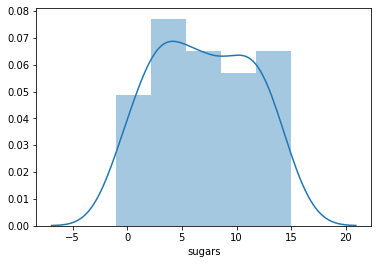

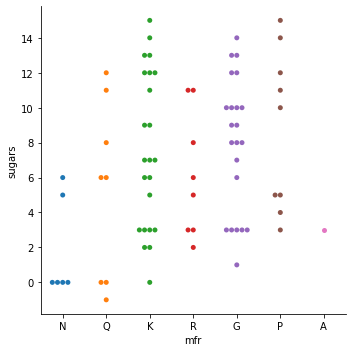

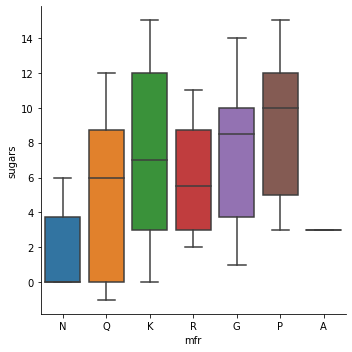

In [8]:
# Use seaborn to create the three visualzations requested by the the marketing team
sns.distplot(cereal.sugars)
sns.catplot(data=cereal, y="sugars", x="mfr", kind="swarm")
sns.catplot(data=cereal, y="sugars", x="mfr", kind="box")

# Part 5: Dietary Calculations

The marketing team has been able to arrange a partnership between the popular Weight Watchers diet brand and Kelloggs cereal.

The [Weight Watchers system](https://www.weightwatchers.com/us/how-it-works/smartpoints) assigns a point value to each food, and participants in the program are allotted a certain number of points each day.

One [recent formula](http://www.exercise4weightloss.com/smart-points-calculator.html) for calculating points is:

    (Calories * .0305) + (Fat * .275) + (Sugar * .12) - (Protein * .098)

First, [select a subset of the data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe) containing just cereals manufactured by Kellogs.

Then, [add a new column](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html) with the Weight Watchers point calculation derived from the data for each of that manufacturer's cereal brands.

Finally, calculate the same summary statistics for the points calculations as earlier (mean, median, standard deviation, min, and max).

In [20]:
# First, filter the dataset to include on cereals manufactured by Kellogs
kellogs = cereal[cereal["mfr"] == "K"]
# Then, add a new column containing the Weight Watchers point calculations
kellogs["points"] = (kellogs["calories"] * .0305) + (kellogs["fat"] * .275) + (kellogs["sugars"] * .12) - (kellogs["protein"] * .098)
kellogs["oldpoints"] = (kellogs["calories"] / 50) + (kellogs["fat"] / 12) - (kellogs["fiber"] / 5)
# Finally, calculate summary statistics for the new column
kellogs.agg({'points': ['min', 'max', 'median', 'mean', 'std'],
             'oldpoints': ['min', 'max', 'median', 'mean', 'std']})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,points,oldpoints
min,1.133000,-1.800000
max,6.696000,2.766667
median,4.577000,2.000000
mean,4.130522,1.676812
std,1.223912,0.973380


## 🌟 Above and Beyond 🌟

The marketing team is pleased with what you've accomplished so far. They have a meeting with top cereal executives in the morning, and they'd like you to do as many of the following additional tasks as you have time for:

1. Weight Watchers used to have an older points system that used this formula: `(calories / 50) + (fat / 12) - (fiber / 5)`, but only the first 4 grams of fiber were included in the calculation. For comparison's sake, create an additional column with the calculation for the old points system.

2. Marketing really likes the boxplot of the sugar content for each cereal, but they'd like it if you could create another version of the plot [with the outliers labeled](https://stackoverflow.com/questions/61734304/label-outliers-in-a-boxplot-python).